# Simple Linear Regression

### Xuanjun (Jason) Gong

## Regression model Ingredients

In regression models, we have a set of independent (predictor) variables and one response (dependent) variable. 

Note: when we have multiple dependent variables, either use multivariate regression model or build several regression models independently for each dependent variable. 

For regression models, we will have a fixed component, denoted as $X$, consisting of independent variables and the intercept (we will talk about intercept a bit later), as well as a random component which accounts for the random distribution of response variables given $X$.

Thus, a big difference between correlation and regression is that

- Correlation treats both independent variable and dependent variable as random variables
- Regression consider only dependent variable as a random variable, and consider the predictors as fixed and known values. 

## Regression model Ingredients

![regression1](./img/regression_model.png)

## Regression model 

### Data Example

Suppose we want to know if there is a linear relationship between children's height and the average of their parent's height. 

Here is a dataset of 1886 Galton's observations on children's and their parents' heights.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

children_height_df = pd.read_csv("./data/GaltonFamilies.csv")
# q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
children_height_df["midparentHeight_bins"] = pd.cut(children_height_df["midparentHeight"],
                                                     bins=10)
children_height_df["midparentHeight_bins"] = children_height_df.midparentHeight_bins.apply(lambda x:x.mid)
children_height_df.head()

,rownames,family,father,mother,midparentHeight,children,childNum,gender,childHeight,midparentHeight_bins
0,1,001,78.5,67.0,75.43,4,1,male,73.2,74.8785
1,2,001,78.5,67.0,75.43,4,2,female,69.2,74.8785
2,3,001,78.5,67.0,75.43,4,3,female,69.0,74.8785
3,4,001,78.5,67.0,75.43,4,4,female,69.0,74.8785
4,5,002,75.5,66.5,73.66,4,1,male,73.5,73.7755


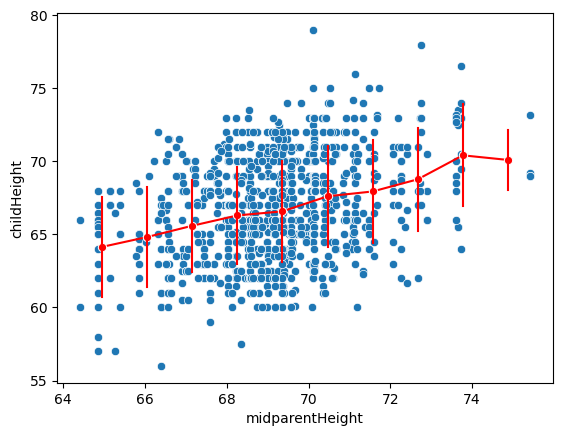

In [2]:
sns.scatterplot(data=children_height_df, x="midparentHeight", y="childHeight")
sns.lineplot(data=children_height_df, x="midparentHeight_bins", y="childHeight",
             err_style="bars", marker='o', color="red", errorbar="sd")
plt.show()

## Regression Ingredient

From the visualization of the data, we can observe that

1. The average children's height is approximately in a straight line across each bin of the mid parent height.
2. The degree of dispersion (variance) is roughly the same across each bin.

## Regression Ingredient

Thus, for a simple regression model, we specify two components:

### Fixed component

The mean of the childrens' height $Y$ is a linear function of midparent's height $X$.

$$
E[Y] = \beta_0 + \beta_1 X
$$

### Random component
The distribution of children's height have a constant variance.
$$
Var(Y) = \sigma^2
$$


Given $X_i$, $Y_i$ is the sum of two components, the fixed component $\beta_0 + \beta_1 X_i$ and the random component $\epsilon_i$

## Regression Ingredient

Adding them together, we will have a simple linear regression model

$$
Y_i = \beta_0 + \beta_1 X_i + \epsilon_i \ \ \ \ \ i=1,2,...,n
\\
Var(\epsilon_i) = \sigma^2
$$

$Y_i$ is the $i$th random sample of the response variable. $X_i$ is the $i$th random sample of the predictor variable. 

### Random errors 
$\epsilon_i$: **uncorrelated, zero mean, equal-variance random** variable.

### Model parameters
$\beta_0$ is the regression intercept, $\beta_1$ is the regression slope, $\sigma^2$ is the error variance.


## Regression Model

A regression model says:

1. The response variable $Y_i$ is a random variable.
2. The mean of the response variable depends on $X_i$ linearly.
3. The variance of $Y_i$ is a constant, and not dependently on $X_i$.
4. Response variable samples $Y_i$ and $Y_j$ ($i \neq j$) are uncorrelated.

## Regression Ingredient

![regression3](./img/reg_beta.jpg)

## Regression Line

The regression line is $Y = \beta_0 + \beta_1 X$ is the fixed component of the regression model. 

### Regression slope $\beta_1$

The change in mean of $Y$ per unit change in $X$

### Regression intercept $\beta_0$

The value of $E[Y]$ when $X=0$

## Regression model estimate

Given a set of random samples of size $N$:  $(X_1, Y_2), (X_2, Y_2), ..., (X_N, Y_N)$

How do we estimate the regression parameter $\beta_0$ and $\beta_1$? And find the regression line $Y = \beta_0 + \beta_1 X$

We need a method to find the pointe estimate of the parameters $\hat{beta_0}$, $\hat{\beta_1}$

### Method of Least Squares (Ordinary Least Square Method; OLS)

The Ordinary Least Square method (OLS) consider the deviation between the observed dependent variable $Y_i$ and the expected response variable based on the regression model $\hat{\beta_0} + \hat{\beta_1}$ as the model error $e_i$.

$$
e_i = Y_i - \hat{Y_i} = Y_i - (\hat{\beta_0} + \hat{\beta_1}X_i)
$$

Then the OLS method aims to minimize the sum of the squared errors $e_i^2$.

## Regression model estimate

<div>
<img src="./img/residuals.png" width="500"/>
</div>

We can denote the sum of the least square errors as $Q$

$$
Q(\hat{\beta_0}, \hat{\beta_1}) = \sum e_i^2 = \sum (Y_i-(\hat{\beta_0} + \hat{\beta_1}X_i))
$$

The estimate $\hat{\beta_0}$ and $\hat{\beta_1}$ minimize $Q$ is the OLS estimator of the regression line. 

## Regression model estimate

$Q$ is a function of $\hat{\beta_0}$ and $\hat{\beta_1}$

Consider the following two regression model with different $\hat{\beta_0}$ and $\hat{\beta_1}$ with data

| index | X | Y |
| --- | --- | --- |
| 0 | 1 | -2 | 
| 1 | 2  |  0  |
| 2 | 3  |  0  |


## Regression model estimate

Which line minimizes $Q = \sum e_i^2$

A | B
- | - 
![alt](./img/q_function_comparison_1.png) | ![alt](./img/q_function_comparison_2.png)


## Regression model estimate

How do we find the pointe estimate of $\hat{\beta_0}$ and $\hat{\beta_1}$? 

There are two solutions:

1. Numerically solve this minimization task $\hat{\beta_0}, \hat{\beta_1} = \underset{\hat{\beta_0}, \hat{\beta_1}}{argmin}( Q(\hat{\beta_0}, \hat{\beta_1}))$
2. Analytically solve this function $Q(\hat{\beta_0}, \hat{\beta_1})$.

$$
\frac{d Q(\hat{\beta_0}, \hat{\beta_1})}{d \hat{\beta_0}} = 0
$$
$$
\frac{d Q(\hat{\beta_0}, \hat{\beta_1})}{d \hat{\beta_1}} = 0
$$

## Solving the OLS problem

The analytical solution to the OLS problem requires a little bit of calculus

$$
\begin{align}
\frac{d Q(\hat{\beta_0}, \hat{\beta_1})}{d \hat{\beta_0}} &= 0
\\
\frac{d \sum (Y_i-\hat{\beta_0}-\hat{\beta_1}X_i)^2}{d \hat{\beta_0}} &= 0
\\
\frac{d \sum (Y_i-\hat{\beta_0}-\hat{\beta_1}X_i)^2}{d(X_i-\hat{\beta_0}-\hat{\beta_1}X_i)} \frac{d(Y_i-\hat{\beta_0}-\hat{\beta_1}X_i)}{d\hat{\beta_0}} &=0 \ \ \ \ \text{By Chain Rule}
\\
2 \sum(Y_i-\hat{\beta_0}-\hat{\beta_1}X_i) * -1 &= 0
\\
-2 \sum(Y_i-\hat{\beta_0}-\hat{\beta_1}X_i) &= 0
\\
\sum(Y_i-\hat{\beta_0}-\hat{\beta_1}X_i) &= 0
\\
\sum Y_i -n\hat{\beta_0} -\hat{\beta_1}\sum X_i &=0
\\
\sum Y_i &= n\hat{\beta_0} + \hat{\beta_1}\sum X_i
\end{align}
$$


## Solving the OLS problem

$$
\begin{align}
\frac{d Q(\hat{\beta_0}, \hat{\beta_1})}{d \hat{\beta_1}} &= 0
\\
\frac{d \sum (Y_i-\hat{\beta_0}-\hat{\beta_1}X_i)^2}{d \hat{\beta_1}} &= 0
\\
\frac{d \sum (Y_i-\hat{\beta_0}-\hat{\beta_1}X_i)^2}{d(Y_i-\hat{\beta_0}-\hat{\beta_1}X_i)} \frac{d(Y_i-\hat{\beta_0}-\hat{\beta_1}X_i)}{d\hat{\beta_1}} &=0 \ \ \ \ \text{By Chain Rule}
\\
2 \sum(Y_i-\hat{\beta_0}-\hat{\beta_1}X_i) * (-X_i) &= 0
\\
-2 \sum(X_i Y_i-\hat{\beta_0}X_i-\hat{\beta_1}X_i) &= 0
\\
\sum(X_i Y_i-\hat{\beta_0}X_i-\hat{\beta_1}X_i) &= 0
\\
\sum X_i Y_i &= \hat{\beta_0}\sum X_i + \hat{\beta_1}\sum X_i^2
\end{align}
$$

## Regression parameter point estimate

By solving the minimization problem of the sum of residual squared, we can arrive at two equations.

$$
\sum Y_i = n\hat{\beta_0} + \hat{\beta_1}\sum X_i
$$
$$
\sum X_i Y_i = \hat{\beta_0} \sum X_i + \hat{\beta_1}\sum X_i^2
$$

These two equations are called **Normal Equations**.

By solving these two equations, we will have the point estimate for the regression intercept $b_0$ and slope $b_1$.

$$
b_0 = \hat{\beta_0} = \bar{Y} - \hat{\beta_1} \bar{X}
$$
$$
\begin{align}
b_1 = \hat{\beta_1} &= \frac{\sum_{i=1}^n (X_i-\bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^n (X_i - \bar{X})^2}
\\
& = \frac{\sum_{i=1}^n X_i Y_i -n \bar{X}\bar{Y}}{\sum_{i=1}^n X_i^2 - n\bar{X}^2}
\end{align}
$$

## Regression Example

We are interested in the spreading patterns of misinformation, and hypothesized that the emotion valence (positive vs. negative) have a linear relationship with the virality of the message on social media. 

We define messsage virality as our dependent variable $Y$, and the valence of the message as our independent variable $X$.

We randomly sampled 5 messsages and measured their corresponding valence value $X$ and virality $Y$, shown in the following table. 


| index | X | Y |
| --- | --- | --- |
| 0 | -1 | 3 | 
| 1 | 0  |  1  |
| 2 | -3  |  5  |
| 3 | 2  |  0  |
| 4 | 1  |  1  |

How do we test the relationship between message valence and message virality? 

## Computing the regression intercept and slope

We construct the regression model

$$
Y_i = \beta_0 + \beta_1 X_i + \epsilon_i \  \text{, $\epsilon_i$ is uncorrelated, zero mean, and constant variance}
$$

Then we need to find the point estimate of regression intercept $b_0$ and the regression slope $b_1$. 

Using the OSL analytical solution, we use the formula:

$$
\begin{align}
\sum X_i Y_i &= -17 \ \ \ \ \sum X_i^2 =15
\\
\bar{X} &= -\frac{1}{5} \ \ \ \ \ \ \ \bar{Y} = 2
\end{align}
$$

$$
\begin{align}
b_1=\hat{\beta_1} &= \frac{\sum_{i=1}^n X_i Y_i -n \bar{X}\bar{Y}}{\sum_{i=1}^n X_i^2 - n\bar{X}^2}
\\
&= \frac{-15-5*(-\frac{1}{5})*2}{15-5*(-\frac{1}{5})^2} = -\frac{75}{74} = -1.014
\end{align}
$$



$$
\begin{align}
b_0=\hat{\beta_0} &= \bar{Y}-b_1\bar{X}
\\
&= 2-(-\frac{75}{74})(-\frac{1}{5}) = \frac{133}{74} = 1.797
\end{align}
$$

## Computing the regression intercept and slope

Thus, we have the estimated regression line: 

$$
Y = 1.797 - 1.014 X
$$

The relationship between valence and virality is that

1. For each unit of increase in valence, there will be 1.014 unit decrease in message virality.
2. When the the valence equals to 0 (neither positive nor negative), the message virality is 1.797.


![reg_estimate](./img/regression_estimate.png)

## Relationship between correlation and simple regression slope

The OSL solution for the regression slope is 

Previously, we have also shown that the estimate of Covariance and Correlation between the two variables are

$$
\begin{align}
\widehat{Cov(X, Y)} = \frac{\sum (X_i - \bar{X})(Y_i -\bar{Y})}{n-1}
\\
r_{x, y} = \frac{\sum (X_i - \bar{X})(Y_i -\bar{Y})}{\sqrt{\sum (X_i-\bar{X})^2} \sqrt{\sum (Y_i-\bar{Y})^2}}
\\
S_x^2 = \frac{\sum (X_i -\bar{X})^2}{n-1} \ \ \ \ \ \ \ \ S_y^2 =  \frac{\sum (Y_i -\bar{Y})^2}{n-1}
\end{align}
$$

Together, we will find out that 

$$
\hat{\beta_1} = \frac{\sum_{i=1}^n (X_i-\bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^n (X_i - \bar{X})^2} = r_{x, y} \frac{S_y}{S_x} = \frac{\widehat{Cov(X,Y)}}{S_x^2}
$$

## Properties of regression line

1. The regression line always pass through $(\bar{X}, \bar{Y})$ and $(0, \hat{\beta_1})$

$$
\hat{Y} = \hat{\beta_0} + \hat{\beta_1}X \ \ \ \ \ \ \ \hat{\beta_0} = \bar{Y} - \hat{\beta_1}\bar{X}
$$

$$
\hat{Y} = (\bar{Y}-\hat{\beta_1}\bar{X}) + \hat{\beta_1}X
$$

Thus when $X = \bar{X}$, the regression line will pass on $Y$: $\hat{Y} = \bar{Y}$

And when $X = 0$, the regression line will pass on $Y$: $\hat{Y} = \hat{\beta_1}$

![reg_line_1](./img/regression_line_property_1.png)

## Properties of regression line
2. For one standard deviation change in $X$ will lead to $r_{x,y}$ unit of standard deviation of change in $Y$.

$$
\begin{align}
\hat{Y_1} &= \hat{\beta_0} + \hat{\beta_1}X_1 = \hat{\beta_0} + r_{x,y}\frac{S_y}{S_x}X_1
\\
X_2 &= X_1 + S_x
\\
\hat{Y_2} &= \hat{\beta_0} + r_{x,y}\frac{S_y}{S_x}X_2
\\
&= \hat{\beta_0} + r_{x,y}\frac{S_y}{S_x}(X_1 + S_x)
\\
&= \hat{\beta_0} + r_{x,y}\frac{S_y}{S_x}X_1 + r_{x,y}\frac{S_y}{S_x}S_x
\\
&= \hat{\beta_0} + r_{x,y}\frac{S_y}{S_x}X_1 + r_{x,y}S_y 
\\
&= \hat{Y_1} + r_{x,y}S_y
\end{align}
$$


![reg_line_2](./img/regression_line_property_2.png)

## Properties of regression line

3. If we standardize the data $X_i'=\frac{X_i-\bar{X}}{S_x}$, $Y_i'=\frac{Y_i-\bar{Y}}{S_y}$, then the regression slope of the standardized data of $X$ and $Y$ is the correlation between $X$ and $Y$ $\hat{\beta_1}=r_{x,y}$, and the regression intercept will become 0

$$\hat{\beta_1} = r_{x,y}$$
$$\hat{\beta_0}=0$$

Because $S_x' = 1$ and $S_y' = 1$, thus $\hat{\beta_1} = r_{x, y} \frac{S_y'}{S_x'}=1$

Also $\bar{X'} = 0$ and $\bar{Y'}=0$, the regression line of the standardized data will pass through $(\bar{X'}, \bar{Y'}) = (0,0)$, thus $\hat{\beta_0}=0$



![reg_line_3](./img/regression_line_property_3.png)

## Properties of OLS estimate

Using OLS method, we estimated regression intercept $\beta_0$ and regression slope $\beta_1$. 

$$\hat{\beta_1} = b_1 = \frac{\sum_{i=1}^n (X_i-\bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^n (X_i - \bar{X})^2}$$
$$\hat{\beta_0} = b_0 = \bar{Y} - \hat{\beta_1} \bar{X}$$

You may wonder how good this estimate is compared to alternative estimate methods.

Based on **Gauss-Markov Theorem**, OLS estimates are **unbiased** estimators of $\beta_0$ and $\beta_1$, and among all possible unbiased estimators, they have the minimum variance. 

In order to better understand our OLS estimators, we need to discover the variance of these estimators. 

Thus, we need to look at the random component of the regression model $\epsilon_i$

## Fitted value and residuals

**Fitted value** are predictions of the regression line. Given a value of $X_i$, what is the $Y$ value on the regression line. It is the estimated dependent variable $\hat{Y_i}$

$$
\hat{Y_i} = \hat{\beta_0} + \hat{\beta_1} X_i = \bar{Y} + \hat{\beta_1}(X_i-\bar{X})
$$

**Residuals** $e_i$ are the differences or errors between the observed values and their respective fitted value. 

$$
\begin{align}
e_i=Y_i-\hat{Y_i} &= Y_i-(\hat{\beta_0} + \hat{\beta_1} X_i)
\\
&= (Y_i-\bar{Y}) - \hat{\beta_1}(X_i-\bar{X})
\end{align}
$$


![residual](./img/fitted_and_residuals.png)

## Properties of residuals

1. Sum of residuals equals to 0 : $\sum_{i=1}^n e_i= 0$

$$
\begin{align}
e_i &= (Y_i-\bar{Y})-\hat{\beta_1}(X_i-\bar{X})
\\
\sum e_i &= \sum [(Y_i-\bar{Y})-\hat{\beta_1}(X_i-\bar{X})]
\\
&= \sum (Y_i-\bar{Y}) -\hat{\beta_1}\sum(X_i-\bar{X})
\\
&= \sum Y_i -\sum \bar{Y} -\hat{\beta_1}(\sum X_i - \sum \bar{X})
\\
&=  n\bar{Y} - n\bar{Y} -\hat{\beta_1}(n\bar{X}-n\bar{X})
\\
&= 0 - \hat{\beta_1} 0
\\
&= 0
\end{align}
$$

## Properties of residuals

2. $\sum_{i=1}^n X_ie_i= 0$

$$
\begin{align}
\sum_{i=1}^n X_ie_i &= \sum X_i [Y_i - \bar{Y}-\hat{\beta_1}(X_i-\bar{X})]
\\
&= \sum(X_iY_i-X_i\bar{Y}-X_i\hat{\beta_1}X_i+\hat{\beta_1}X_i\bar{X})
\\
&= \sum X_iY_i -\bar{Y}\sum X_i - \hat{\beta_1}\sum X_i^2 + \hat{\beta_1}\bar{X}\sum X_i
\\
&= \sum X_iY_i -n\bar{X}\bar{Y} - \hat{\beta_1}\sum X_i^2 + \hat{\beta_1}n\bar{X}^2
\\
&= \sum X_iY_i - n\bar{X}\bar{Y} - \hat{\beta_1}(\sum X_i^2-n\bar{X}^2)
\\
&\text{Given that $\hat{\beta_1} = \frac{\sum X_iY_i - n\bar{X}\bar{Y}}{\sum X_i^2 -n\bar{X}^2}$}
\\
\sum_{i=1}^n X_ie_i&= \sum X_iY_i - n\bar{X}\bar{Y} - \frac{\sum X_iY_i -n \bar{X}\bar{Y}}{\sum X_i^2-n\bar{X}^2}(\sum X_i^2-n\bar{X}^2)
\\
&= \sum X_iY_i -n\bar{X}\bar{Y}-\sum X_iY_i + n\bar{X}\bar{Y}
\\
&= 0
\end{align}
$$

## Properties of residuals
3. Combining the previous two properties, we will have $\sum_{i=1}^n \hat{Y_i}e_i = 0$

$$
\begin{align}
\hat{Y_i} &= \hat{\beta_0} + \hat{\beta_1}X_i
\\
\sum_{i=1}^n \hat{Y_i}e_i &= \sum (\hat{\beta_0} + \hat{\beta_1}X_i) e_i
\\
&= \sum \hat{\beta_0} e_i + \sum \hat{\beta_1} X_i e_i
\\
&= \hat{\beta_0} \sum e_i + \hat{\beta_1} \sum X_i e_i
\\
&= \hat{\beta_0} * 0 + 0 * \hat{\beta_1} \ \ \ \ \ \text{Given $\sum e_i = 0$ and $\sum X_i e_i = 0$}
\\
&=0
\end{align}
$$


## Properties of residuals

In summary, regression residuals (the random component) are considered a random variable $\epsilon_i = Y_i-(\beta_0 + \beta_1 X_i)$, and its random samples $e_i = Y_i-(\hat{\beta_0}+ \hat{\beta_1}X_i)$ are constrained by two rules.

1. $\sum_{i=1}^n e_i= 0$
2. $\sum_{i=1}^n X_ie_i= 0$

It has a mean of 0, and we define the variance of errors as $\sigma^2$, thus we have 

1. $E[\epsilon_i] = 0$
2. $Var(\epsilon_i) = \sigma^2$


## Estimate of random error

Random error $\epsilon_i$ has a mean of 0, so we do not need to estimate for it. It is known. 

But we are left with its unknown variance $\sigma^2$, and we need to estimate the variance of $\epsilon_i$ by its random samples $e_i$.

Knowing the variance of errors $\sigma^2$ is crucially important, as it gives us information about how good our regression estimates and our regression model are.

### Step 1
We first estimate the OLS estimate of regression intercept $\hat{\beta_0}$ and regression slope $\hat{\beta_1}$. Then we can calculate the $\hat{Y_i} = \hat{\beta_0} + \hat{\beta_1}X_i$, then we can obtain the random samples of random error 

$$\hat{\epsilon_i} = e_i = Y_i - \hat{Y_i} = Y_i -  (\hat{\beta_0} + \hat{\beta_1}X_i)$$

## Estimate of random error
### Step 2
We obtain the **Sum of Squared Errors** $SSE$

$$SSE = \sum_{i=1}^n e_i^2=\sum_{i==1}^n (Y_i-\hat{Y_i})^2$$

### Step 3
We define **Mean Squared Errors** $MSE$

$$MSE = \frac{SSE}{n-2} = \frac{\sum (Y_i -\hat{Y_i})^2}{n-2}$$

Then $MSE$ is our unbiased estimator for $\sigma^2$

$$\hat{\sigma^2} = MSE$$

## Mean Squared Errors

Why $MSE$ is an unbiased estimator of $\sigma^2$?

We have previously discussed using sample variance $S^2$ as an unbiased estimator for a random variable $X$ with its random samples $X_i$ of size $n$.

$$
S^2=\frac{1}{n-1}\sum (X_i-\bar{X})^2
$$
$$
E[S^2] = \sigma^2
$$

This is because calculating $S^2=\frac{1}{n-1}\sum (X_i-\bar{X})^2$ is constraint by the sample mean such that $\frac{\sum X_i}{n} = \bar{X}$, which reduced 1 **degree of freedom** in $\sum (X_i-\bar{X})^2$, thus we need to divide it by its degree of freedom $n-1$. 

#### Why do we not use the sample variance of $e_i$ to estimate $\sigma^2$ as we did for other random variables?

### Degree of freedom of SSE

We can consider $e_i$ as a vector of random variables

$$
\boldsymbol{e} = [e_1, e_2, e_3, ... , e_n]
$$

**Degree of Freedom** of $SSE = \sum e_i^2$ is the number of its components that are free to vary. 

Recall that $\sum e_i = 0$ and $\sum X_ie_i =0$. Thus, this vector of random samples of error has a degree of freedom of $n-2$, because it is constraint by these two rules, which results in

$$d.f.(SSE) = n-2$$

Another way to interpret it is that $SSE$ is constraint by the two parameters that we have already estimated $\hat{\beta_0}$ and $\hat{\beta_1}$ in the regression model, thus reducing its degree of freedom by 2. 

Thus, we will have 

$$
E[SSE] = (n-2) \sigma^2
$$
$$
E[MSE] = \frac{SSE}{n-2} = \sigma^2
$$

## Point estimate for regression parameters

In summary, we have shown how we can use the random samples $(X_i, Y_i)$, to estimate the regression parameters $\beta_0$, $\beta_1$, and $\sigma^2$ using the OLS method.

$$
\begin{align}
\hat{\beta_1} = b_1 &= \frac{\sum (X_i-\bar{X})(Y_i-\bar{Y})}{\sum (X_i-\bar{X})^2}
\\
\hat{\beta_0} = b_0 &= \bar{Y} - b_1 \bar{X}
\\
\hat{\sigma^2} = MSE &= \frac{1}{n-2} \sum e_i^2
\\
&= \frac{1}{n-2}\sum (Y_i-\hat{Y_i})^2
\\
&= \frac{1}{n-2} \sum (Y_i - b_0 -b_1X_i)^2
\end{align}
$$

## Sampling distribution of regression parameters

In order to make statistical inferences about the regression parameters $\hat{\beta_0}$ and $\hat{\beta_1}$, we need to know their sampling distributions. 

First, we need to work on regression slope $\hat{\beta_1} = b_1$

$$
\begin{align}
\hat{\beta_1} = b_1 &= \frac{\sum (X_i-\bar{X})(Y_i-\bar{Y})}{\sum (X_i -\bar{X})^2}
\\
&= \frac{\sum(X_i-\bar{X})Y_i}{\sum (X_i-\bar{X})^2}-\frac{\sum (X_i-\bar{X})\bar{Y}}{\sum (X_i-\bar{X})^2}
\\
&= \frac{\sum(X_i-\bar{X})Y_i}{\sum (X_i-\bar{X})^2} -\frac{\sum X_i\bar{Y}-\sum \bar{X}\bar{Y}}{\sum(X_i-\bar{X})^2}
\\
&= \frac{\sum(X_i-\bar{X})Y_i}{\sum (X_i-\bar{X})^2} -\frac{n\bar{X}\bar{Y}-n \bar{X}\bar{Y}}{\sum(X_i-\bar{X})^2}
\\
&= \frac{\sum(X_i-\bar{X})Y_i}{\sum (X_i-\bar{X})^2}
\end{align}
$$

## Sampling distribution of regression parameters

We show that $\hat{\beta_1} = b_1 = \frac{\sum(X_i-\bar{X})Y_i}{\sum (X_i-\bar{X})^2}$,

Now, since in the regression model, we treat $X$ as known constant values not random variables, thus $X_i$ and $\bar{X}$ are considered constant.

Thus, we can treat $\frac{X_i-\bar{X}}{\sum(X_i-\bar{X})^2}$ as known constant. 

We define

$$
k_i = \frac{X_i-\bar{X}}{\sum (X_i-\bar{X})^2}
$$

Thus, we will have 

$$
\hat{\beta_1} = b_1 = \sum k_i Y_i \ \ \ \ \ \ \ \text{$k_i$ is a known constant}
$$

## Properties of $k_i$

This constant $k_i$ have three properties:

1. $\sum k_i = 0$
    
    $$
    \sum k_i = \frac{\sum (X_i-\bar{X})}{\sum (X_i-\bar{X})^2} = \frac{\sum X_i-\sum \bar{X}}{\sum (X_i-\bar{X})^2} = \frac{n\bar{X}-n\bar{X}}{\sum (X_i-\bar{X})^2} = 0
    $$

2. $\sum k_i X_i = 1$

    $$
    \begin{align}
    \sum k_i X_i = \frac{\sum (X_i-\bar{X})X_i}{\sum (X_i-\bar{X})^2} &= \frac{\sum(X_i-\bar{X}X_i)}{\sum (X_i^2-2\bar{X}X_i+\bar{X}^2)}
    \\
    &= \frac{\sum X_i^2-\bar{X} \sum X_i}{\sum X_i^2 -2\bar{X}\sum X_i+\sum\bar{X}^2}
    \\
    &= \frac{\sum X_i^2 -n\bar{X}^2}{\sum X_i^2-2n\bar{X^2}+n\bar{X}^2}
    \\
    &= \frac{\sum X_i^2-n\bar{X}^2}{\sum X_i^2-n\bar{X}^2} = 1
    \end{align}
    $$

## Properties of $k_i$

3. $\sum k_i^2 = \frac{1}{\sum (X_i-\bar{X})^2}$
    $$
    \begin{align}
    \sum k_i^2 &= \sum [\frac{X_i-\bar{X}}{\sum(X_i-\bar{X})^2}]^2
    \\
    &= [\frac{1}{\sum (X_i-\bar{X})^2}]^2 \sum(X_i-\bar{X})^2
    \\
    &= \frac{1}{\sum (X_i-\bar{X})^2}
    \end{align}
    $$

## Sampling distribution of regression parameters

Now, we have $b_1 = \sum k_iY_i$, we can derive

$$
\begin{align}
E[b_1] &= E[\sum k_i Y_i]
\\
&= \sum E[k_i Y_i]
\\
&= \sum k_i E[Y_i]
\\
&= \sum k_i (\beta_0 + \beta_1 X_i)
\\
&= \sum k_i \beta_0 + \sum k_i \beta_1 X_i
\\
&= \beta_0 \sum k_i + \beta_1 \sum k_i X_i \ \ \ \ \ \ \ \text{Given that $\sum k_i=0$ and $\sum k_i X_i=1$}
\\
&= \beta_1
\end{align}
$$

## Sampling distribution of regression parameters

Similarly, we have $b_0 = \bar{Y}-b_1\bar{X}$, thus we can derive

$$
\begin{align}
E[b_0] &= E[\bar{Y}-b_1\bar{X}]
\\
&= E[\bar{Y}] - E[b_1 \bar{X}] \ \ \ \ \ \ \text{Given that $E[\bar{Y}] = \beta_0 + \beta_1 \bar{X}$}
\\
&= \beta_0 + \beta_1 \bar{X} - \bar{X}E[b_1]
\\
&= \beta_0 + \beta_1 \bar{X} - \bar{X} \beta_1
\\
&= \beta_0
\end{align}
$$

Together, we have shown that the OLS estimators $b_0$ and $b_1$ are **unbiased** estimators of $\beta_0$ and $\beta_1$.

Next, let's discover the variance of the sampling distributions of $b_0$ and $b_1$.

## Sampling distribution of regression parameters

Importantly, we can show that $b_0$ and $b_1$ are linear combinations of random samples of dependent variables $Y_i$. 

We have shown that

$$
b_1 = \sum k_i Yi
$$

Considering $k_i$ are known constants, thus $b_1$ is a linear combination of $Y_1$. 

$$
\begin{align}
b_0 = \bar{Y} - b_1 \bar{X} &= \sum \frac{Y_i}{n} - \sum k_i Y_i \bar{X}
\\
&= \sum (\frac{Y_i}{n}-k_i \bar{X} Y_i) = \sum (\frac{1}{n} - k_i \bar{X})Y_i
\end{align}
$$

Since $\frac{1}{n}-k_i\bar{X}$ are also known constants, $b_0$ is also a linear combination of $Y_i$.

## Sampling distribution of regression parameters

Now, we can start to work on the sampling variance of $b_1$ and $b_0$. 

First, we show that the variance of $b_1$ 

$$
\begin{align}
Var(b_1) &= Var(\sum k_i Y_i) \ \ \ \ \text{Given that $Y_i=\beta_0+\beta_1X_i+ \epsilon_i$ are uncorrelated with each other}
\\
&= \sum Var(k_iY_i) \ \ \ \ \text{ Given that $k_i$ is known constant}
\\
&= \sum k_i^2 Var(Y_i)
\\
&= \sum k_i \sigma^2
\\
&= \sigma^2 \sum k_i^2
\\
&= \sigma^2 \frac{1}{\sum (X_i-\bar{X})^2}
\end{align}
$$


## Sampling distribution of regression parameters

Next, we show the variance of $b_0$

$$
\begin{align}
Var(b_0) &= Var[\sum (\frac{1}{n}-k_i \bar{X})Y_i]
\\
&= \sum Var[\sum (\frac{1}{n}-k_i \bar{X})Y_i]
\\
&= \sum (\frac{1}{n}-k_i\bar{X})^2 Var(Y_i)
\\
&= \sum (\frac{1}{n}-k_i \bar{X})^2 \sigma^2
\\
&= \sum (\frac{1}{n^2}-\frac{2k_i\bar{X}}{n}+k_i^2\bar{X}^2) \sigma^2
\\
&= \sigma^2(\sum \frac{1}{n^2}-\sum \frac{2k_i\bar{X}}{n} + \sum k_i^2\bar{X}^2)
\\
&= \sigma^2 (\frac{1}{n} - \frac{2\bar{X}}{n}\sum k_i+\bar{X}^2\sum k_i^2) \ \ \ \text{Given $\sum k_i^2 = \frac{1}{\sum (X_i-\bar{X})^2}$ and $\sum k_i = 0$}
\\
&= \sigma^2 (\frac{1}{n}+\frac{\bar{X}^2}{\sum (X_i -\bar{X})^2})
\end{align}
$$

## Sampling distribution of regression parameters

Put together, we have shown that 

1. The expected value of $b_0$ is $\beta_0$
2. The expected value of $b_1$ is $\beta_1$
3. The variance of $b_1$ is $\sigma^2 \frac{1}{\sum (X_i-\bar{X})^2}$
4. The variance of $b_0$ is $\sigma^2 (\frac{1}{n}+\frac{\bar{X}^2}{\sum (X_i -\bar{X})^2})$
5. The unbiased estimator of $\sigma^2$ is $MSE = \frac{1}{n-2}\sum e_i^2 = \frac{1}{n-2}\sum (Y_i - b_0 - b_1 X_i)^2$

# Normal Error Model

In order to make statistical inference on $\beta_0$ and $\beta_1$, we need to make an additional assumption: **Normal Error Model**.

We assume that the error term $\epsilon_i$ follows a $i.i.d$ **normal distribution** with mean of 0, and variance of $\sigma^2$.

$$
\begin{align}
Y_i &= \beta_0 + \beta_1 X_i + \epsilon_i
\\
\epsilon_i &\overset{i.i.d}{\sim} N(0, \sigma^2)
\\
\text{Thus we have   }Y_i &\overset{i.i.d}{\sim} N(\beta_0 + \beta_1X_i, \sigma^2)
\end{align}
$$

## Normal Error Model

![regression2](./img/regression_model_2.jpeg)

## Normal sampling distribution of $b_0$ and $b_1$

When we assume $\epsilon_i \sim N(0, \sigma^2)$, we will have $Y_i$ follow $i.i.d$ normal distribution $Y_i \sim N(\beta_0+\beta_1 X_i, \sigma^2)$.  

We also know that $b_1$ and $b_0$ is a linear combination of $Y_i$ 

$$b_1 = \hat{\beta_1} = \sum k_i Y_i$$
$$b_0 = \hat{\beta_1} = \sum (\frac{1}{n}-k_i\bar{X})Y_i$$

Thus, we also know that $b_1$ and $b_0$ also follow **normal distribution**. And we will have 

$$
b_1 \sim N(\frac{\sum (X_i-\bar{X})(Y_i-\bar{Y})}{\sum (X_i-\bar{X})^2}, \sigma^2 \frac{1}{\sum (X_i -\bar{X})^2})
$$
$$
b_0 \sim N(\bar{Y} - b_1 \bar{X}, \sigma^2(\frac{1}{n} + \frac{\bar{X}^2}{\sum (X_i-\bar{X})^2}))
$$

## Z test on $b_0$ and $b_1$

If the error variance $\sigma^2$ is known, we can apply a $Z$ test on $b_0$ and $b_1$, by constructing the standard error $s.e.$ and their $Z$ statistics. 


|  | $b_0$ | $b_1$ |
| --- | --- | --- |
| $H_0$ | $\beta_0 = 0$ | $\beta_1 = 0$ | 
| $H_1$ | $\beta_0 \neq 0$  |  $\beta_1 \neq 0$  |
| $s.e.$ | $\sqrt{\sigma^2(\frac{1}{n} + \frac{\bar{X}^2}{\sum (X_i-\bar{X})^2})}$  |  $\sqrt{\sigma^2 \frac{1}{\sum (X_i -\bar{X})^2}}$  |
| $Z$ Statistic | $Z_{\beta_0}= \frac{\bar{Y} - b_1 \bar{X}}{\sqrt{\sigma^2(\frac{1}{n} + \frac{\bar{X}^2}{\sum (X_i-\bar{X})^2})}}$  |  $Z_{\beta_1}= \frac{\frac{\sum (X_i-\bar{X})(Y_i-\bar{Y})}{\sum (X_i-\bar{X})^2}}{\sqrt{\sigma^2 \frac{1}{\sum (X_i -\bar{X})^2}}}$  |

Where $Z_{\beta_0} \sim Z$ and $Z_{\beta_1} \sim Z$ follow $Z$ distributions. 

Therefore, we can apply null hypothesis testing on $\beta_0$ and $\beta_1$ using the $Z$ distribution, and calculate their $p$ values.


## T test on $b_0$ and $b_1$

When the error variance $\sigma^2$ is unknown, which is most of the cases, we can estimate $\sigma^2$ by $MSE$ as $\hat{\sigma^2} = MSE = \frac{1}{n-2} \sum (Y_i-b_0 - b_1 X_i)^2$, and construct the $t$ statistics for $b_0$ and $b_1$. 

|  | $b_0$ | $b_1$ |
| --- | --- | --- |
| $H_0$ | $\beta_0 = 0$ | $\beta_1 = 0$ | 
| $H_1$ | $\beta_0 \neq 0$  |  $\beta_1 \neq 0$  |
| $s.e.$ | $\sqrt{MSE(\frac{1}{n} + \frac{\bar{X}^2}{\sum (X_i-\bar{X})^2})}$  |  $\sqrt{MSE \frac{1}{\sum (X_i -\bar{X})^2}}$  |
| $T$ Statistic | $T_{\beta_0}= \frac{\bar{Y} - b_1 \bar{X}}{\sqrt{MSE(\frac{1}{n} + \frac{\bar{X}^2}{\sum (X_i-\bar{X})^2})}}$  |  $T_{\beta_1}= \frac{\frac{\sum (X_i-\bar{X})(Y_i-\bar{Y})}{\sum (X_i-\bar{X})^2}}{\sqrt{MSE \frac{1}{\sum (X_i -\bar{X})^2}}}$  |
| $T$ degree of freedom | $n-2$  |  $n-2$  |

Where $T_{\beta_0} \sim t_{n-2}$ and $T_{\beta_1} \sim t_{n-2}$ follow $t$ distributions with degree of freedom $n-2$. 

This is because we estimated 2 parameters $\beta_0$ and $\beta_1$, thus 2 degree of freedom were lost.

## Confidence Interval for $\beta_0$ and $\beta_1$

We have shown that the standard error for $\hat{\beta_0}$ and $\hat{\beta_1}$ are

$$
s.e.(b_0) = \sqrt{MSE(\frac{1}{n} + \frac{\bar{X}^2}{\sum (X_i-\bar{X})^2})}
$$
$$
s.e.(b_1) = \sqrt{MSE \frac{1}{\sum (X_i -\bar{X})^2}}
$$

We can thus construct the $95%$ confidence interval for $\beta_0$ and $\beta_1$

$$
95\% \ C.I.(\beta_0) = [b_0 - t_{n-2, 0.975}\ s.e.(b_0), b_0 + t_{n-2, 0.975}\ s.e.(b_0)]
$$
$$
95\% \ C.I.(\beta_1) = [b_1 - t_{n-2, 0.975}\ s.e.(b_1), b_1 + t_{n-2, 0.975}\ s.e.(b_1)]
$$

Thus, we can use the $T$ statistic and its sampling distribution $t_{n-2}$ or use the 95% confidence interval to test the hypothesis for both $\beta_0$ and $\beta_1$.

## Analysis of Variance (ANOVA)

Besides the $t$ test, an alternative method named **Analysis of Variance** (ANOVA) exists to test the relationship between the independent and dependent variables with the regression model.

### Idea
Attributing variation in the data into different sources through decomposition of the total variation. 

In regression, the variation in dependent variable $Y$ comes from two sources. 

1. Variation in error term $\epsilon$ (random fluctuation)
2. Variation in dependent variable $X$

## Partition of Total deviation

We define **Total deviation** as the differences between $Y_i$ and its sample mean $\bar{Y}$: $Y_i-\bar{Y}$

The total deviation can be decompiosed into two terms:

$$
Y_i - \bar{Y} = (Y_i-\hat{Y_i}) - (\hat{Y_i} - \bar{Y})
$$

where $Y_i - \hat{Y_i}$ is the residual term $e_i$, and the other term $\hat{Y_i} - \bar{Y}$ is the deviation of the fitted value to its sample mean. 

## Partition of Total Variation

We can also decompose the sum of squares of the total deviation, or **Sum of Squared Total Variation** ($SSTO = \sum (Y_i-\bar{Y})^2$) into two terms **Sum of Squared Error** ($SSE = \sum (Y_i-\hat{Y_i})^2$) and **Sum of Squared Regression** ($SSR = \sum (\hat{Y_i} - \bar{Y})^2$).

$$
\begin{align}
SSTO &= \sum (Y_i - \bar{Y})^2
\\
SSE &= \sum (Y_i - \hat{Y_i})^2
\\
SSR &= \sum (\hat{Y_i}-\bar{Y})^2
\\
SSTO &= SSE + SSR
\end{align}
$$

## Partition of Total Variation Proof


$$
\begin{align}
SSTO &= \sum (Y_i-\bar{Y})^2
\\
&= \sum [(Y_i-\hat{Y_i})-(\hat{Y_i}-\bar{Y})]^2
\\
&= \sum [(Y_i-\hat{Y_i})^2 - 2(Y_i-\hat{Y_i})(\hat{Y_i}-\bar{Y})+(\hat{Y_i}-\bar{Y})^2]
\\
&= \sum (Y_i-\hat{Y_i})^2 + \sum (\hat{Y_i}-\bar{Y})^2 - 2\sum (Y_i-\hat{Y_i})(\hat{Y_i}-\bar{Y})
\end{align}
$$

Given that 

$$
\begin{align}
\sum(Y_i-\hat{Y_i})(\hat{Y_i}-\bar{Y}) &= \sum \hat{Y_i}(Y_i-\hat{Y_i})-\sum\bar{Y}(Y_i-\hat{Y_i})
\\
&= \sum \hat{Y_i}(Y_i-Y_i)-\bar{Y}\sum (Y_i-\hat{Y_i}) \ \ \ \ \text{Given $Y_i-\hat{Y_i} = e_i$}
\\
&= \sum \hat{Y_i}e_i-\bar{Y}\sum e_i \ \ \ \  \text{Given $\sum e_i=0$ and $\sum \hat{Y_i}e_i=0$}
\\
&= 0 
\end{align}
$$

Thus, we have 

$$
SSTO = \sum (Y_i-\hat{Y_i})^2 + \sum (\hat{Y_i}-\bar{Y_i})^2 = SSE + SSR
$$

## Degree of Freedom of Sum of Squares

We can find the degree of freedom for $SSE$, $SSR$, and $SSTO$.

For $SSTO = \sum (Y_i - \bar{Y})^2$, the vector of random samples $Y_i$ is the size of $n$, and it is constraint by the estimated parameter $\bar{Y}$, thus the degree of freedom of $SSTO$ is $n-1$.

For $SSE = \sum (Y_i - \hat{Y_i})^2 = \sum e_i^2$, the vector of random samples $e_i$ is size of $n$, and it is constraint by the two estimated parameters $\hat{\beta_0}$ and $\hat{\beta_1}$, thus it loses 2 degrees of freedom. Thus the degree of freedom of $SSE$ is $n-2$. 

For $SSR = \sum (\hat{Y_i}-\bar{Y})^2$, it only have 1 degree of freedom, because it only varies due to the variation in estimated regression slopes $\hat{\beta_1}$

And we have $d.f.(SSTO) = d.f.(SSE) + d.f.(SSR)$

| | $SSTO$ | $SSE$ | $SSE$ |
| --- | --- | --- | --- |
| $d.f.$ | $n-1$ | $n-2$ |  $1$ | 

## Sum of Squared Regression
We can show the $SSR$ can be expressed by the estimated regression slopes $\hat{\beta_1}$

$$
\begin{align}
SSR &= \sum (\hat{Y_i}-\bar{Y})^2
\\
&= \sum (\hat{\beta_0}+\hat{\beta_1}X_i-\bar{Y})^2
\\
&= \sum (\bar{Y}-\hat{\beta_1}\bar{X}+\hat{\beta_1}X_i-\bar{Y})^2
\\
&= \sum [\hat{\beta_1}(X_i-\bar{X})]^2
\\
&= \hat{\beta_1}^2\sum(X_i-\bar{X})^2 \ \ \ \ \ \text{the vector $X_i$ has no degree of freedom as known values}
\end{align}
$$

Thus the larger regression slope $\hat{\beta_1}$ is the larger $SSR$ is. And the larger dispersion of $X_i$  have ($\sum (X_i-\bar{X})^2$), the larger $SSR$ is. 

## Mean of Squares

We then define the **Mean Squres of Total Variation** ($MSTO$), **Mean Squares of Errors** ($MSE$) and the **Mean Squares of Regression** ($MSR$) by dividing the sum of squares by its degree of freedom. 

$$
\begin{align}
MSTO &= \frac{SSTO}{d.f.(SSTO)} = \frac{SSTO}{n-1}
\\
MSE &= \frac{SSE}{d.f.(SSE)} = \frac{SSE}{n-2}
\\
MSR &= \frac{SSR}{d.f.(SSR)} = \frac{SSR}{1}
\end{align}
$$

## Expected value of Mean of Squares

We have computed the expected value of $SSE$ and $SSR$ previously.

$$
\begin{align}
E[MSE] &= E[\frac{SSE}{n-2}] = \sigma^2
\\
E[SSR] &= E[(n-2)MSE] = (n-2)E[MSE] = (n-2)\sigma^2
\\
E[MSR] &= E[\frac{SSR}{1}] = E[SSR] = \beta_1^2\sum(X_i-\bar{X})^2 + \sigma^2
\\
\end{align}
$$

Thus, we know that $MSR$ is always larger or equal to $MSE$

$$
E[MSR] \ge E[MSE]
$$

And $MSR$ equals to $MSE$ when $\beta_1 = 0$

$$
E[MSR] = \beta_1^2\sum(X_i-\bar{X})^2 + \sigma^2 = \beta_1^2\sum(X_i-\bar{X})^2 + E[MSE]
$$

## Expected value of $MSR$ proof

Here we prove the expected of $MSR$.
$$
\begin{align}
E[MSE] &= E[SSR]
\\
&= E[\hat{\beta_1}^2 \sum (X_i-\bar{X})^2]
\\
&= E[\hat{\beta_1}^2]\sum(X_i-\bar{X})^2
\end{align}
$$

Given that 

$$
\begin{align}
E[\hat{\beta_1}^2] &= E[\hat{\beta_1}]^2 + Var(\hat{\beta_1}^2)
\\
&= \beta_1^2 + \frac{\sigma^2}{\sum (X_i-\bar{X})^2}
\end{align}
$$

Thus, we will have

$$
\begin{align}
E[MSR] &= (\beta_1^2 + \frac{\sigma^2}{\sum (X_i-\bar{X})^2})\sum(X_i-\bar{X})^2
\\
&= \beta_1^2\sum(X_i-\bar{X})^2 + \sigma^2
\end{align}
$$

## ANOVA inference testing with $F$ test

Under the normal error model ($\epsilon_i \overset{i.i.d}{\sim} N(0, \sigma^2)$), we will have 

$$
\frac{SSE}{\sigma^2} \sim \chi_{n-2}^2
$$

Recall that $F$ distribution is defined as

$$
\frac{U_1/d_1}{U_2/d_2} \sim F_{n,m}
$$
$$
U_1 \sim \chi_n^2 \ \ \ \ \ \ \ \ U_2 \sim \chi_m^2
$$

## ANOVA inference testing with F test

Thus, we can conduct the $F$ null hypothesis testing:

$$
H_0: \beta_1 = 0
$$
$$
H_1: \beta_1 \ne 0
$$

Under $H_0: \beta_1 = 0$, we have $E[SSR] = E[\frac{SSR}{1}] = E[SSR] = \beta_1^2\sum(X_i-\bar{X})^2 + \sigma^2 = \sigma^2$


## ANOVA inference testing with F test

Then we will have 

$$
\frac{SSR}{\sigma^2} \sim \chi_1^2
$$

Combining with 
$$
\frac{SSE}{\sigma^2} \sim \chi_{n-2}^2
$$

We can construct the $F$ statistic

$$
\begin{align}
F &= \frac{\frac{SSR}{\sigma^2}/1}{\frac{SSE}{\sigma^2}/(n-2)}
\\
&= \frac{SSR/1}{SSE/n-2}
\\
&= \frac{MSR}{MSE} \sim F_{1, n-2}
\end{align}
$$

Then, we use the $F$ statistic and its sampling distribution $F_{1, n-2}$ with degree of freedom of $1$ and $n-2$ to test the hypothesis.

## Equivalence of F test and two-tailed t test

Note that in simple regression (when we only have one independent variable), $F$ test is equivalent to two-tailed $t$ test on $\beta_1$.

This is because the $F$ statistic equals to the squared $t$ statistic, and the sampling distribution of $F_{1, n-2}$ is equivalent of squared $t_{n-2}$ distribution.

$$
F = (T)^2
$$
$$
F_{1, n-2} = t^2_{n-2}
$$

## ANOVA table

Taken together, to perform the F test, we can construct the ANOVA table:

| Source of Variation  | $SS$ | $d.f.$ | $MS$ | $F$ |
| --- | --- | --- | --- | --- |
| Regression | $SSR = \sum (\hat{Y_i}-\bar{Y})^2$ | $1$ | $MSR=\frac{SSR}{1}$ | $F=\frac{MSR}{MSE}$ | 
| Error | $SSE = \sum(Y_i-\hat{Y_i})^2$ |  $n-2$  | $MSE=\frac{SSE}{n-2}$ | | 
| Total | $SSTO = \sum(Y_i - \bar{Y})^2$  |  $n-1$  | | | 

And have 

$$
F=\frac{MSR}{MSE} \sim F_{1, n-2}
$$

## Coefficient of Determination

Based on decomposition of Sum of Squares Variation, we can define **Coefficient of Determination** $R^2$ as

$$
R^2 = \frac{SSR}{SSTO} = 1-\frac{SSR}{SSTO}
$$

The coefficient of determination $R^2$ indicates the percentage of total variation explained by the regression model.

$$
0 \le R^2 \le 1
$$

Such that 
1. If all observations fall into one straight line, then $R^2 =1$.
2. If the fitted regression line is horizontal, then $R^2 = 0$

The coefficient of determination $R^2$ serves as an indicator for how good the linear relationship is, or how good our regression model is to explain the variation in dependent variable $Y$. If there is a non-linear relationship between $X$ and $Y$, then $R^2$ is not meaningful. 

## Regression Model Variance

One way to interpret the variance of regression slope and intercept is to consider our regression model/line varies due to the variation of random samples. 

Consider the relationship between weight and height. If you conduct a study twice with different samples, will you have the same regression estimate $b_0$ and $b_1$? 

As shown previously, when we fit a regression model under the normal error assumption, we can not only estimate the regression line ($b_0$, and $b_1$), but also the variation of this regression line by estimating the model variation in regression slopes and intercept. 

How do we capture this model variation? 


![reg_var](./img/animation.gif)

## Regression Mean Response

We can define the **Mean Response** as the value of the dependent variable $Y_h$ on the regression line for the dependent variable $X_h$.

![mean_resp](./img/reg_mean_response.png)

## Variation in Mean Response

Given that $Yh = \beta_0 + \beta_1 Xh$, and due to the variation in estimate of $\hat{\beta_0}$ and $\hat{\beta_1}$, we can expect $Yh$ varies due to the variability in the regression estimates. 

We can estimate the mean response $Yh$

$$
\hat{Yh} = \hat{\beta_0} + \hat{\beta_1}Xh = \bar{Y} + \hat{\beta_1}(Xh-\bar{X})
$$

Under normal error model

$$
\begin{align}
E[\hat{Yh}] &= E[\hat{\beta_0}] + E[\hat{\beta_1}Xh] = \beta_0 + \beta_1 Xh
\\
Var(\hat{Yh}) &= Var(\hat{\beta_0}+\hat{\beta_1}Xh)
\\
&= \sigma^2[\frac{1}{n}+\frac{(Xh-\bar{X})^2}{\sum (X_i-\bar{X})^2}]
\end{align}
$$

## Variation in Mean Response

Thus, we have

$$
\hat{Yh} \sim N(\beta_0+ \beta_1Xh, \sigma^2[\frac{1}{n}+\frac{(Xh-\bar{X})^2}{\sum (X_i-\bar{X})^2}])
$$

By estimating $\sigma^2$ by $MSE$, we can have the standard error of $Yh$:

$$
s.e.(\hat{Yh}) = \sqrt{MSE[\frac{1}{n}+\frac{(Xh-\bar{X})^2}{\sum (X_i-\bar{X})^2}]}
$$

From these results, we can find that the variation in regression mean response $Yh$ is larger when 

1. $Xh$ is further away from $\bar{X}$.
2. Dispersion of $X$ is small.
3. Model error $\sigma^2$ is large.

## Confidence Interval of mean response

Using the standard error of mean response $s.e.(Yh)$, we can construct the $t$ statistic and the 95% confidence interval of $\hat{Yh}$ using its sampling $t$ distribution 

$$
\begin{align}
\hat{Yh} &\sim N(\beta_0+ \beta_1Xh, \sigma^2[\frac{1}{n}+\frac{(Xh-\bar{X})^2}{\sum (X_i-\bar{X})^2}])
\\
\frac{\hat{Yh} - (\hat{\beta_0}+ \hat{\beta_1}Xh)}{\sqrt{MSE[\frac{1}{n}+\frac{(Xh-\bar{X})^2}{\sum (X_i-\bar{X})^2}]}} &\sim t_{n-2}
\\
95\%\ C.I. (Yh) &= (\hat{\beta_0} + \hat{\beta_1}Xh) \pm t_{n-2, 0.975}\sqrt{MSE[\frac{1}{n}+\frac{(Xh-\bar{X})^2}{\sum (X_i-\bar{X})^2}]}
\end{align}
$$

This 95% confidence interval of the mean response $Yh$ is considered the 95% confidence interval for the regression model. 

## Plot the regression model variance

![reg_var](./img/reg_variance.png)

## Predicting New Outcomes with Regression Model

When we are trying to make prediction with regression model, we make the prediction based on the regression line $Yh=\hat{\beta_0} + \hat{\beta_1} Xh$. 

We have shown that mean response $Yh$ with variance $\sigma^2[\frac{1}{n}+\frac{(Xh-\bar{X})^2}{\sum (X_i-\bar{X})^2}]$. 

When we are trying to make predictions for new observations, which is observations that is not in our samples to estimate the model.

With new observation with independent variable value $X = Xh$, we make the prediction for $Yh_{new}$ by the mean response $pred_h = \hat{Yh}$

$$
\begin{align}
\hat{Yh} &= \hat{\beta_0} + \hat{\beta_1} Xh
\\
Yh_{new} &= \beta_0 + \beta_1 Xh + \epsilon_h
\\
\epsilon_h &\sim N(0, \sigma_h^2)
\end{align}
$$

## Prediction Error of regression model
We can express the variance of the prediction error as $Yh_{new}-\hat{Yh}$. 

It is straightforward to show that $E[Yh_{new}-\hat{Yh}] =0$, but what is its variance?

We assume the new observation uncorrelated with existing data $\sigma_h^2 = \sigma^2$

$$
\begin{align}
Var(Yh_{new} - \hat{Yh}) &= Var(\hat{Yh}) + \sigma^2_h
\\
&= \sigma^2[\frac{1}{n}+\frac{(Xh-\bar{X})^2}{\sum (X_i-\bar{X})^2}] + \sigma^2
\\
&= \sigma^2[{\color{red} 1} + \frac{1}{n}+\frac{(Xh-\bar{X})^2}{\sum (X_i-\bar{X})^2}]
\end{align}
$$

## Prediction Interval of regression model

With the mean and variance of prediction error $Yh_{new}-\hat{Yh}$, we can construct the $t$ statistic for the prediction errors

$$
\frac{\hat{Yh}-Yh_{new}}{s.e.(pred_h)} \sim t_{n-2}
$$
$$
s.e.(pred_h) = \sqrt{MSE[{\color{red} 1} + \frac{1}{n}+\frac{(Xh-\bar{X})^2}{\sum (X_i-\bar{X})^2}]}
$$

And construct the 95% Prediction Interval for new observation at $Xh$ as

$$
\hat{Yh} \pm t_{n-2, 0.975} \sqrt{MSE[{\color{red} 1} + \frac{1}{n}+\frac{(Xh-\bar{X})^2}{\sum (X_i-\bar{X})^2}]}
$$

## Prediction Interval vs Confidence Interval

Comparing the 95% confidence interval and the 95% prediction interval 

$$
95\%\ C.I. (Yh) = (\hat{\beta_0} + \hat{\beta_1}Xh) \pm t_{n-2, 0.975}\sqrt{MSE[\frac{1}{n}+\frac{(Xh-\bar{X})^2}{\sum (X_i-\bar{X})^2}]}
$$

$$
95\%\ P.I. (Yh) = (\hat{\beta_0} + \hat{\beta_1}Xh) \pm t_{n-2, 0.975}\sqrt{MSE[{\color{red} 1} + \frac{1}{n}+\frac{(Xh-\bar{X})^2}{\sum (X_i-\bar{X})^2}]}
$$

Thus, the prediction interval is always wider than the confidence interval, since we need to make prediction for new observations, which come with new errors uncorrelated with existing data. 

![prediction_interval](./img/prediction_interval.png)

### Supplemental Figures code

/tmp/ipykernel_3951247/3513515016.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept, slope = results.params[0], results.params[1]


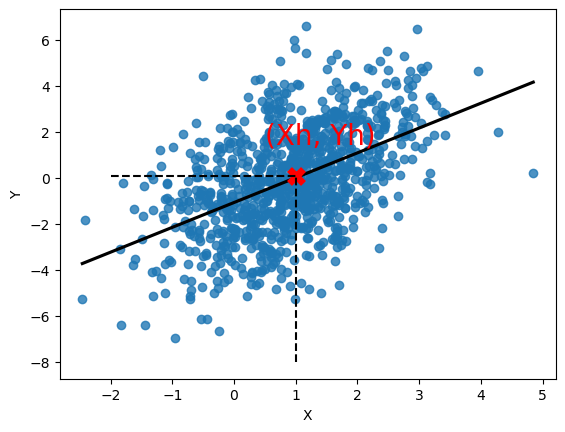

In [203]:

import statsmodels.api as sm

df = pd.read_csv("./data/toy_data.csv")
sns.regplot(data=df, x="X", y="Y", ci=None, line_kws={"color": "black"})

model = sm.OLS(df.Y, sm.add_constant(df.X))
results = model.fit()
intercept, slope = results.params[0], results.params[1]

xh = 1
yh = intercept + slope*slope

plt.plot(xh, yh, 'rx', markersize=10, markeredgewidth=5)

plt.plot([xh, xh], [-8, yh], 'k--')
plt.plot([-2, xh], [yh, yh], 'k--')

plt.text(0.5, 1.5, "(Xh, Yh)", color="red",fontsize=20)

plt.show()

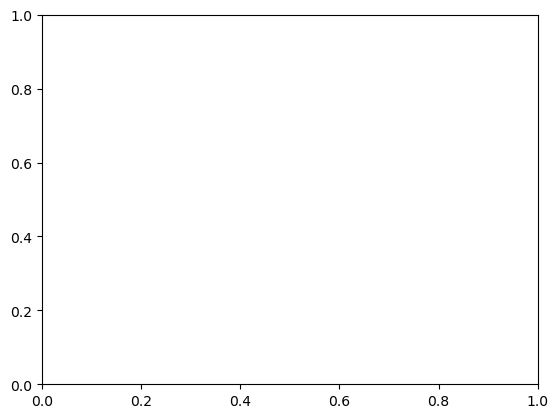

In [214]:


import statsmodels.api as sm
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()

df = pd.read_csv("./data/toy_data.csv")


def animate(i):
    # Update plot elements based on frame number i
    # Clear previous frame (optional, if needed)
    ax.clear()
    # Redraw elements with updated data
    sns.regplot(data=df, x="X", y="Y", ci=None, line_kws={"color": "black"}, ax=ax)
    sns.regplot(data=df.sample(100), x="X", y="Y", ci=None, color="red", ax=ax)
    # Set axis limits or other properties (optional)
    ax.set_xlim(-3, 5)
    ax.set_ylim(-8,7)
    return


ani = FuncAnimation(fig, animate, frames=30, interval=60, repeat=True)
ani.save('./img/animation.gif', writer='imagemagick')

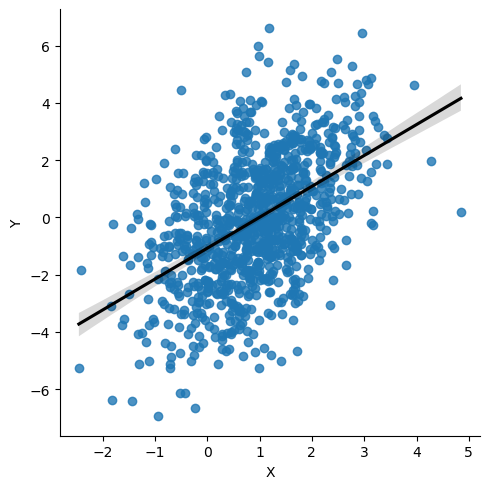

In [217]:
sns.lmplot(data=df, x="X", y="Y", line_kws={"color": "black"})
# sns.regplot(data=df, x="X", y="Y", ci=)

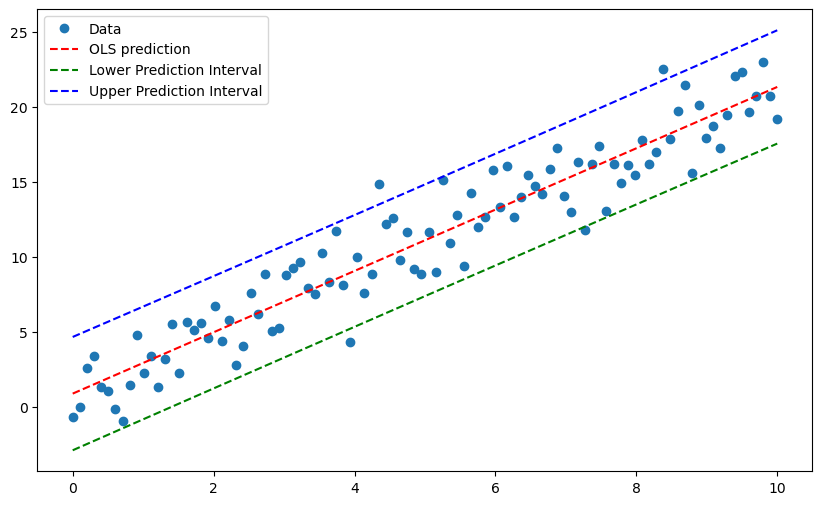

In [218]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Sample data
x = np.linspace(0, 10, 100)
y = 2*x + 1 + np.random.normal(0, 2, 100)

# Add constant to the model
X = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Get prediction intervals
pred_std, lower, upper = wls_prediction_std(results)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y, 'o', label='Data')
ax.plot(x, results.fittedvalues, 'r--', label='OLS prediction')
ax.plot(x, lower, 'g--', label='Lower Prediction Interval')
ax.plot(x, upper, 'b--', label='Upper Prediction Interval')

ax.legend(loc='best')
plt.show()

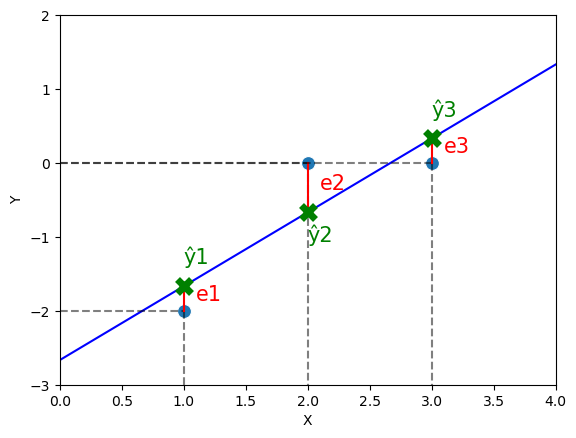

In [162]:
x = np.array([1, 2, 3])
y = np.array([-2, 0, 0])
xlim = np.array([0, 4])
ylim = np.array([-3, 2])

sns.scatterplot(x=x, y=y, s=100)

plt.plot(xlim, [-2.6667, 4-2.6667], color="blue")
y_hat = -2.6667 + x

for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], ylim[0]], 'k--', alpha=0.5)
    plt.plot([xlim[0], x[i]], [y[i], y[i]], 'k--', alpha=0.5)
    plt.plot([x[i], x[i]], [y[i], y_hat[i]], color="red")
    plt.plot(x[i], y_hat[i], 'gx', markersize=10, markeredgewidth=5)
    
plt.text(x[0]+0.1, y_hat[0]-0.2, "e1", color="red",fontsize=15)
plt.text(x[1]+0.1, y_hat[1]+0.3, "e2", color="red",fontsize=15)
plt.text(x[2]+0.1, y_hat[2]-0.2, "e3", color="red",fontsize=15)

plt.text(x[0], y_hat[0]+0.3, "ŷ1", color="g",fontsize=15)
plt.text(x[1], y_hat[1]-0.4, "ŷ2", color="g",fontsize=15)
plt.text(x[2], y_hat[2]+0.3, "ŷ3", color="g",fontsize=15)

plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])
plt.show()

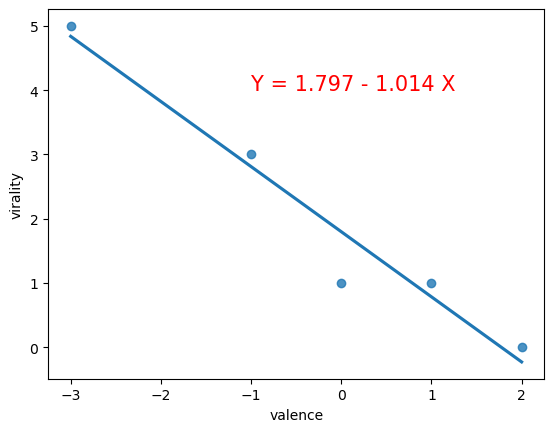

In [90]:
x = [-1, 0, -3, 2, 1]
y = [3, 1, 5, 0, 1]
df = pd.DataFrame({"valence": x, "virality": y})

sns.regplot(df, x="valence", y="virality", ci=None)
plt.text(-1, 4, "Y = 1.797 - 1.014 X", color="red",fontsize=15)
plt.show()

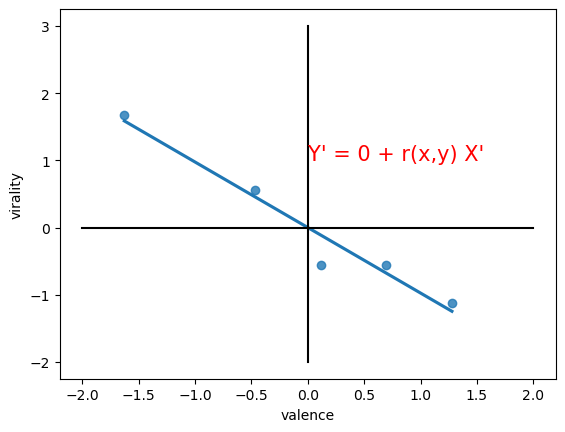

In [145]:
x = np.array([-1, 0, -3, 2, 1])
y = np.array([3, 1, 5, 0, 1])
x = (x-x.mean())/x.std()
y = (y-y.mean())/y.std()
df = pd.DataFrame({"valence": x, "virality": y})

sns.regplot(df, x="valence", y="virality", ci=None)

plt.plot([-2, 2], [0, 0], color="black")
plt.plot([0, 0], [-2, 3], color="black")
plt.text(0, 1, "Y' = 0 + r(x,y) X'", color="red",fontsize=15)
plt.show()

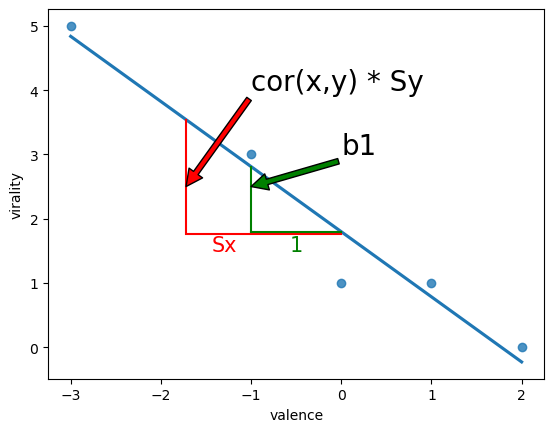

In [140]:
x = [-1, 0, -3, 2, 1]
y = [3, 1, 5, 0, 1]

beta_1 = -1.014 
beta_0 = 1.797

df = pd.DataFrame({"valence": x, "virality": y})
std_x = np.std(x)
std_y = np.std(y)
corr_xy = np.corrcoef(x, y)[0,1]
sns.regplot(df, x="valence", y="virality", ci=None)

plt.plot([-std_x, 0], [beta_0-0.03, beta_0-0.03], color="red")
plt.plot([-1, 0], [beta_0, beta_0], color="green")
plt.plot([-std_x, -std_x], [beta_0, beta_0-beta_1*std_x], color="red")
plt.plot([-1, -1], [beta_0, beta_0-beta_1], color="green")

plt.annotate('b1', fontsize=20,
             xy =(-1, 2.5), 
                xytext =(0, 3),  
                arrowprops = dict(facecolor ='green'),) 

plt.annotate('cor(x,y) * Sy', fontsize=20,
             xy =(-std_x, 2.5), 
                xytext =(-1, 4),  
                arrowprops = dict(facecolor ='red'),) 

plt.annotate('1', xy=(-0.5, 1.5), xytext=(-0.5, 1.5), 
            fontsize=15, ha='center', color="green")

plt.annotate('Sx', xy=(-1.3, 1.5), xytext=(-1.3, 1.5), 
            fontsize=15, ha='center', color="red")


plt.show()

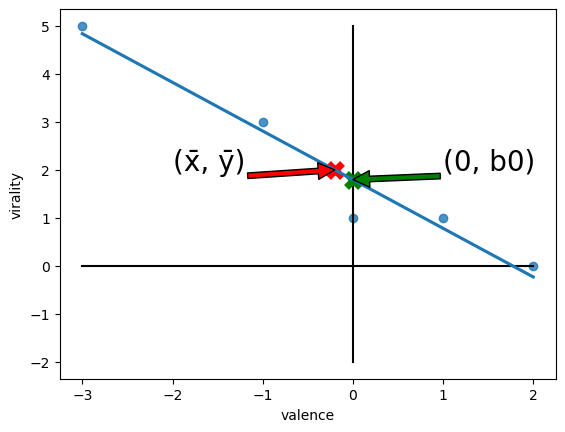

In [89]:
x = [-1, 0, -3, 2, 1]
y = [3, 1, 5, 0, 1]
df = pd.DataFrame({"valence": x, "virality": y})
plt.plot([-3, 2], [0, 0], color="black")
plt.plot([0, 0], [-2, 5], color="black")

plt.plot(np.mean(x), np.mean(y), 'rx', markersize=10, markeredgewidth=5)

plt.annotate('(x̄, ȳ)', fontsize=20,
             xy =(np.mean(x), np.mean(y)), 
                xytext =(-2, 2),  
                arrowprops = dict(facecolor ='red'),) 

plt.annotate('(0, b0)', fontsize=20,
             xy =(0, 1.797), 
                xytext =(1, 2),  
                arrowprops = dict(facecolor ='green'),) 

plt.plot(0, 1.797, 'gx', markersize=10, markeredgewidth=5)

sns.regplot(df, x="valence", y="virality", ci=None)

plt.show()

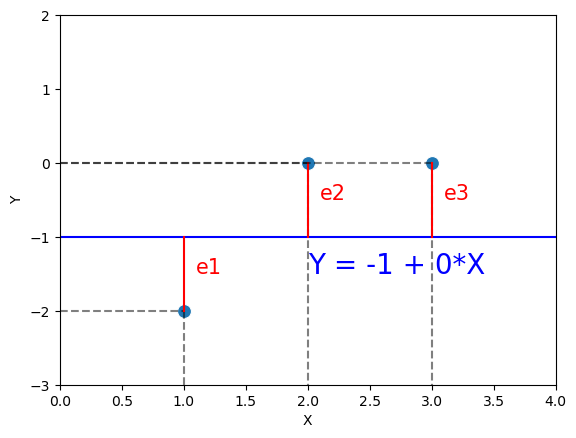

In [57]:
x = [1, 2, 3]
y = [-2, 0, 0]
xlim = [0, 4]
ylim = [-3, 2]

sns.scatterplot(x=x, y=y, s=100)

plt.plot(xlim, [-1, -1], color="blue")

plt.text(2, -1.5, "Y = -1 + 0*X", color="blue",fontsize=20)

for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], ylim[0]], 'k--', alpha=0.5)
    plt.plot([xlim[0], x[i]], [y[i], y[i]], 'k--', alpha=0.5)
    plt.plot([x[i], x[i]], [y[i], -1], color="red")
    plt.text(x[i]+0.1, (y[i]-1)/2, "e{}".format(i+1), color="red",fontsize=15)

plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])
plt.show()

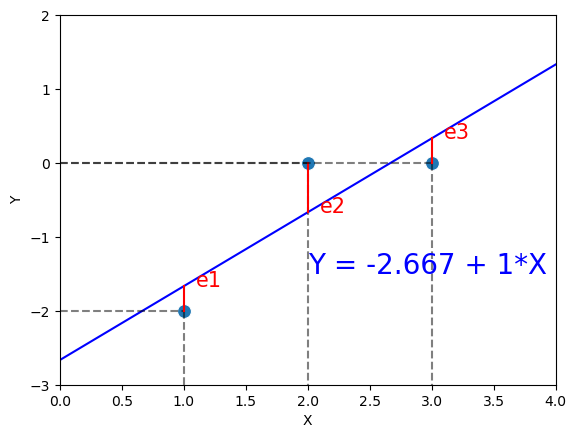

In [56]:
x = np.array([1, 2, 3])
y = np.array([-2, 0, 0])
xlim = np.array([0, 4])
ylim = np.array([-3, 2])

sns.scatterplot(x=x, y=y, s=100)

plt.plot(xlim, [-2.6667, 4-2.6667], color="blue")
y_hat = -2.6667 + x

plt.text(2, -1.5, "Y = -2.667 + 1*X", color="blue",fontsize=20)

for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], ylim[0]], 'k--', alpha=0.5)
    plt.plot([xlim[0], x[i]], [y[i], y[i]], 'k--', alpha=0.5)
    plt.plot([x[i], x[i]], [y[i], y_hat[i]], color="red")
    plt.text(x[i]+0.1, y_hat[i], "e{}".format(i+1), color="red",fontsize=15)

plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])
plt.show()